# Importing necessary libraries

In [148]:
# for analysis and nymeric funtion
import pandas as pd
import numpy as np

# for visulization
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [149]:
df = pd.read_csv('C:\\Users\\rashmi.bharti\\Downloads\\day.csv')

In [150]:
df.head

<bound method NDFrame.head of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed 

In [151]:
df.shape

(730, 16)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Missing Value check

In [153]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [154]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [155]:
num_cols =["instant","dteday","temp","atemp","hum","windspeed","casual","registered","cnt"] 
cat_cols =["season","yr","mnth","holiday","weekday","workingday","weathersit"]

# Univariate analysis

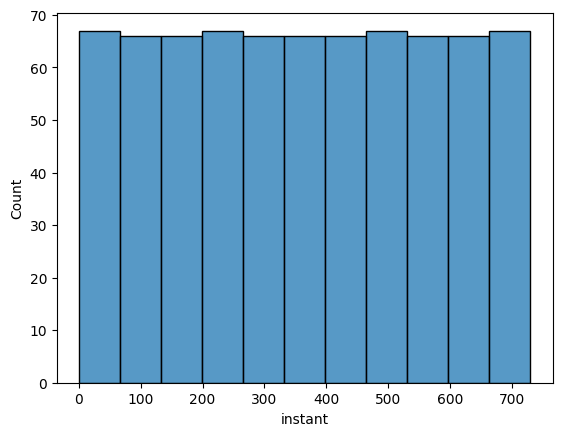

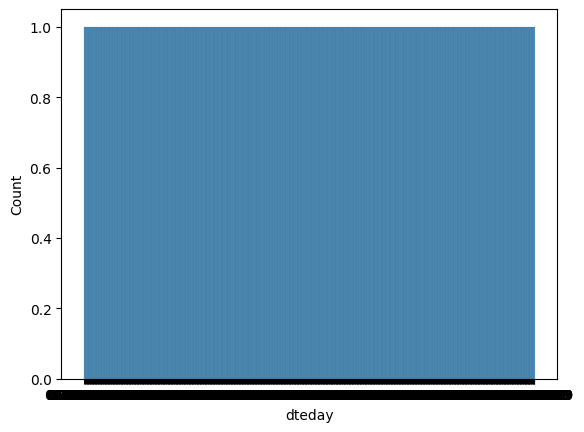

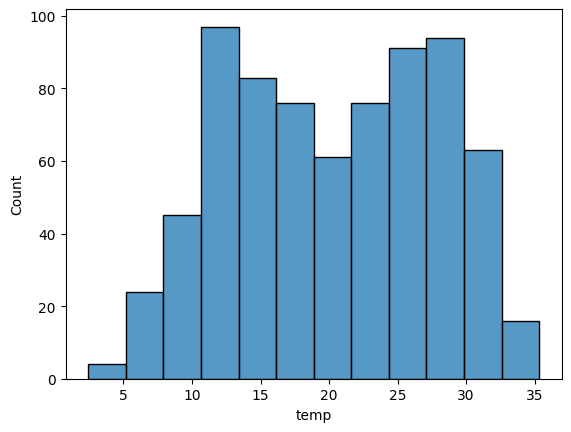

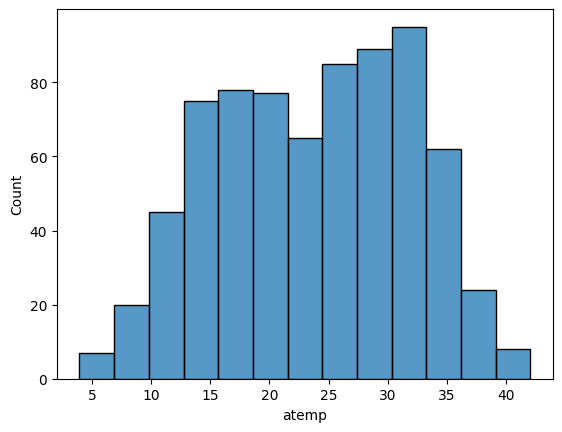

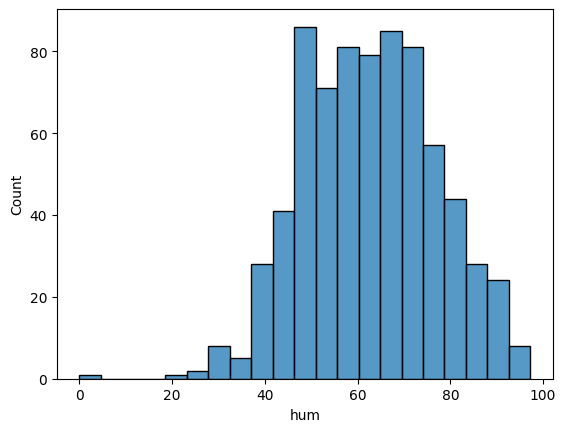

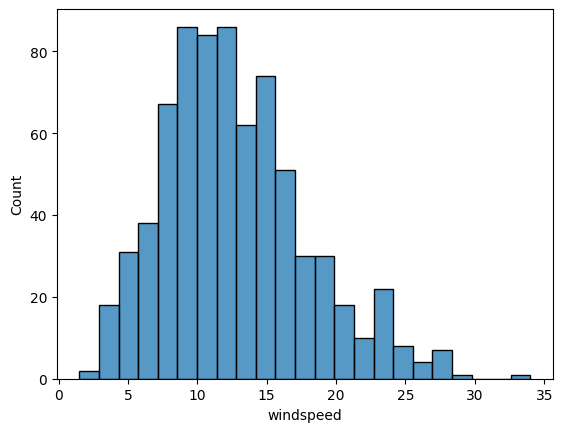

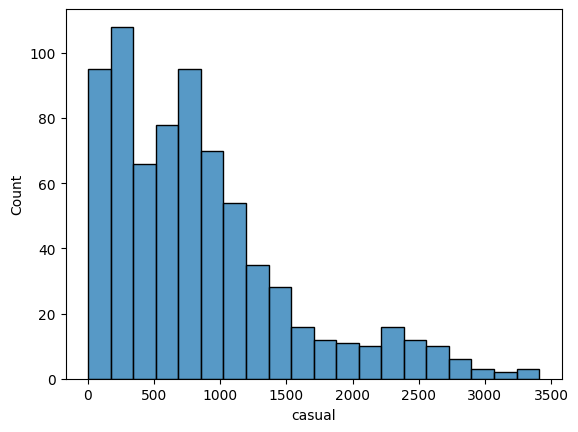

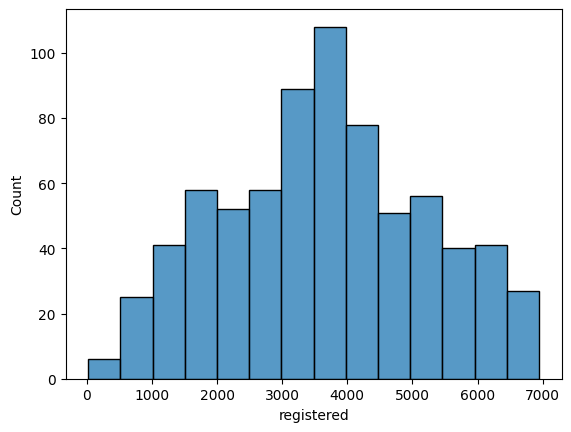

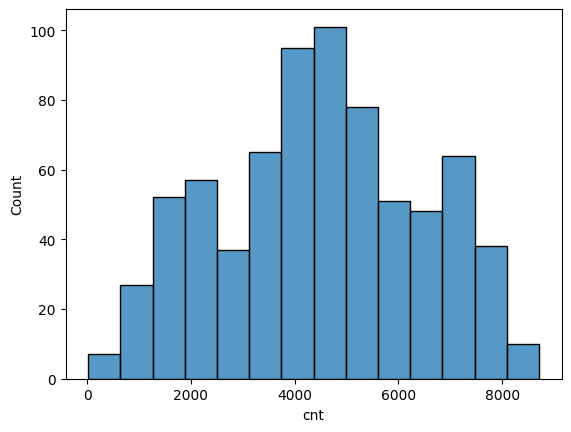

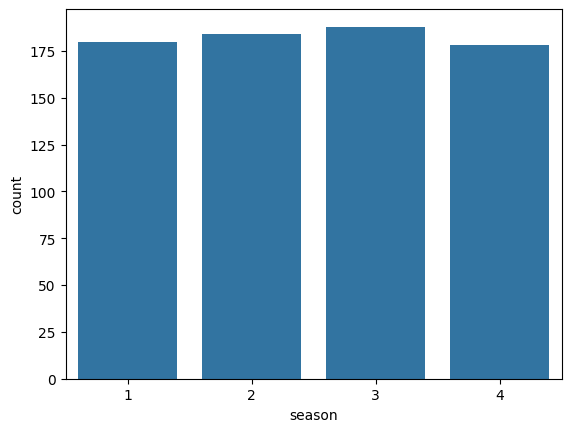

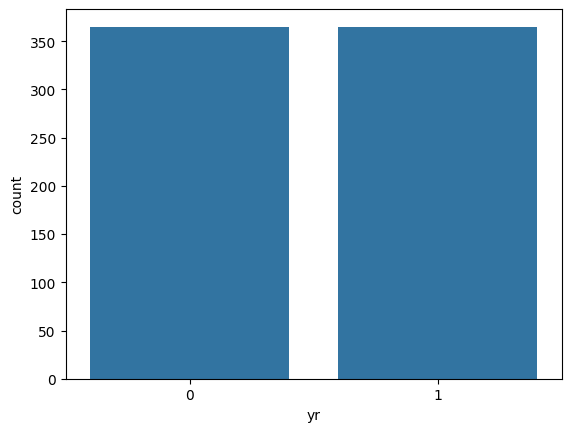

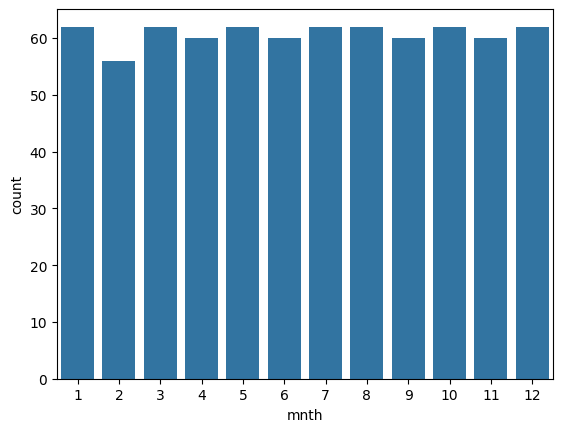

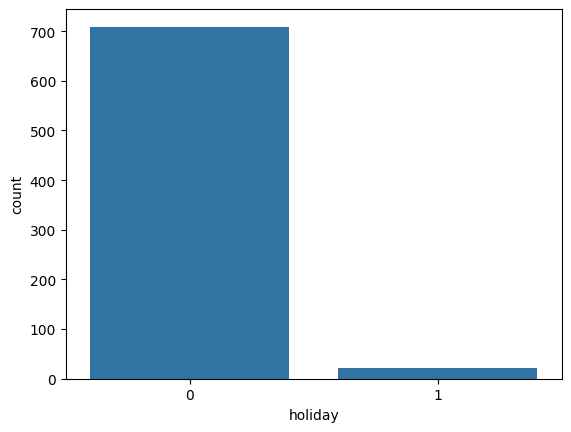

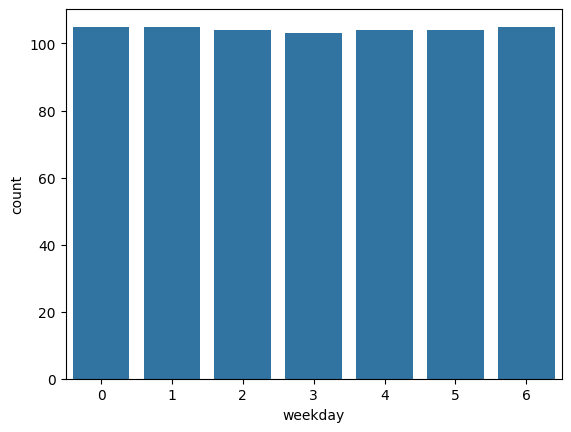

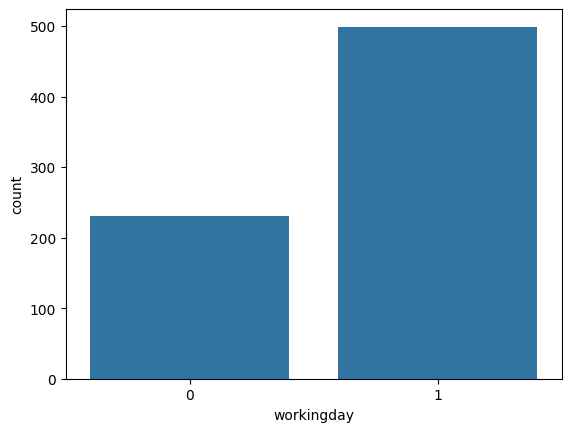

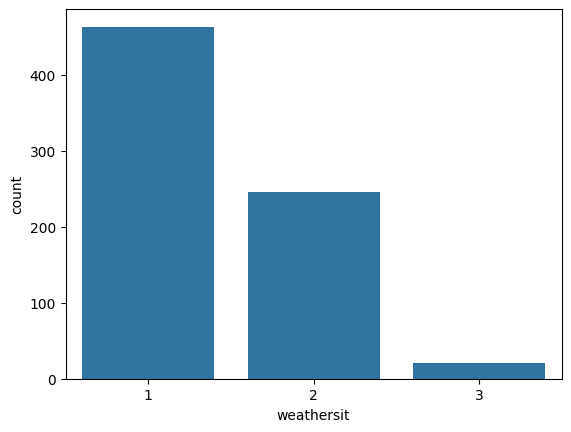

In [156]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

# Bivariate Analysis

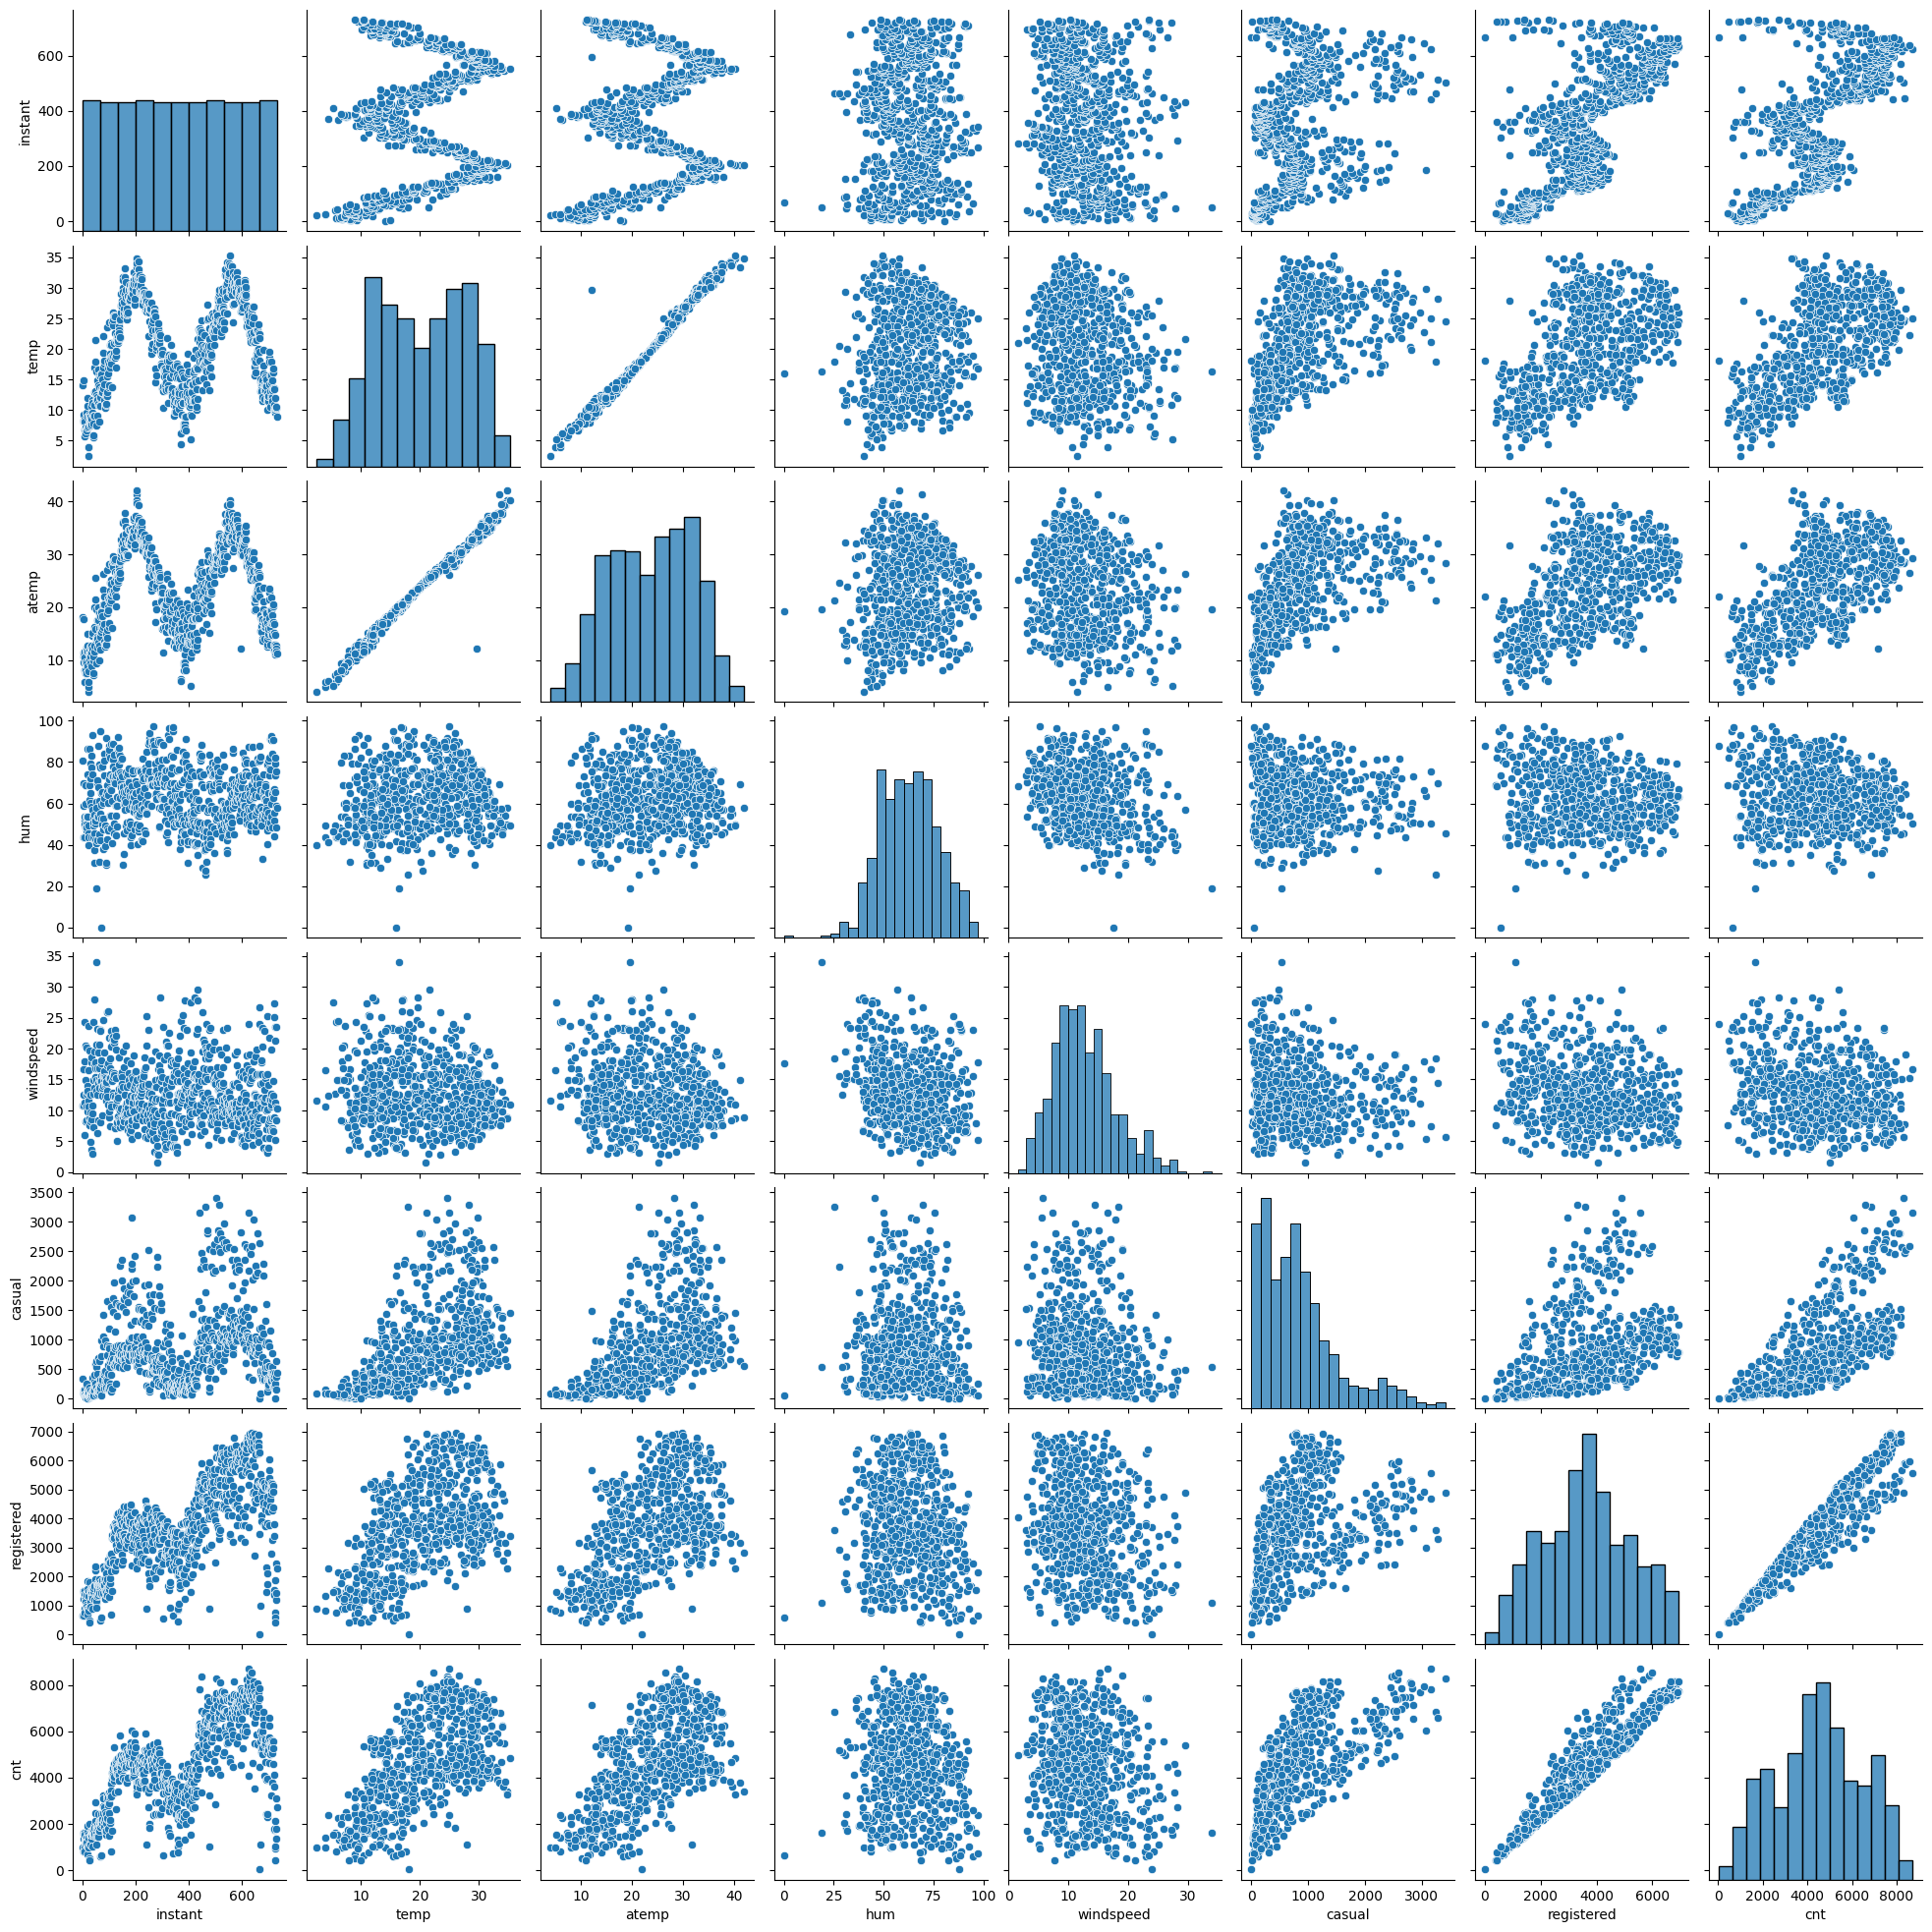

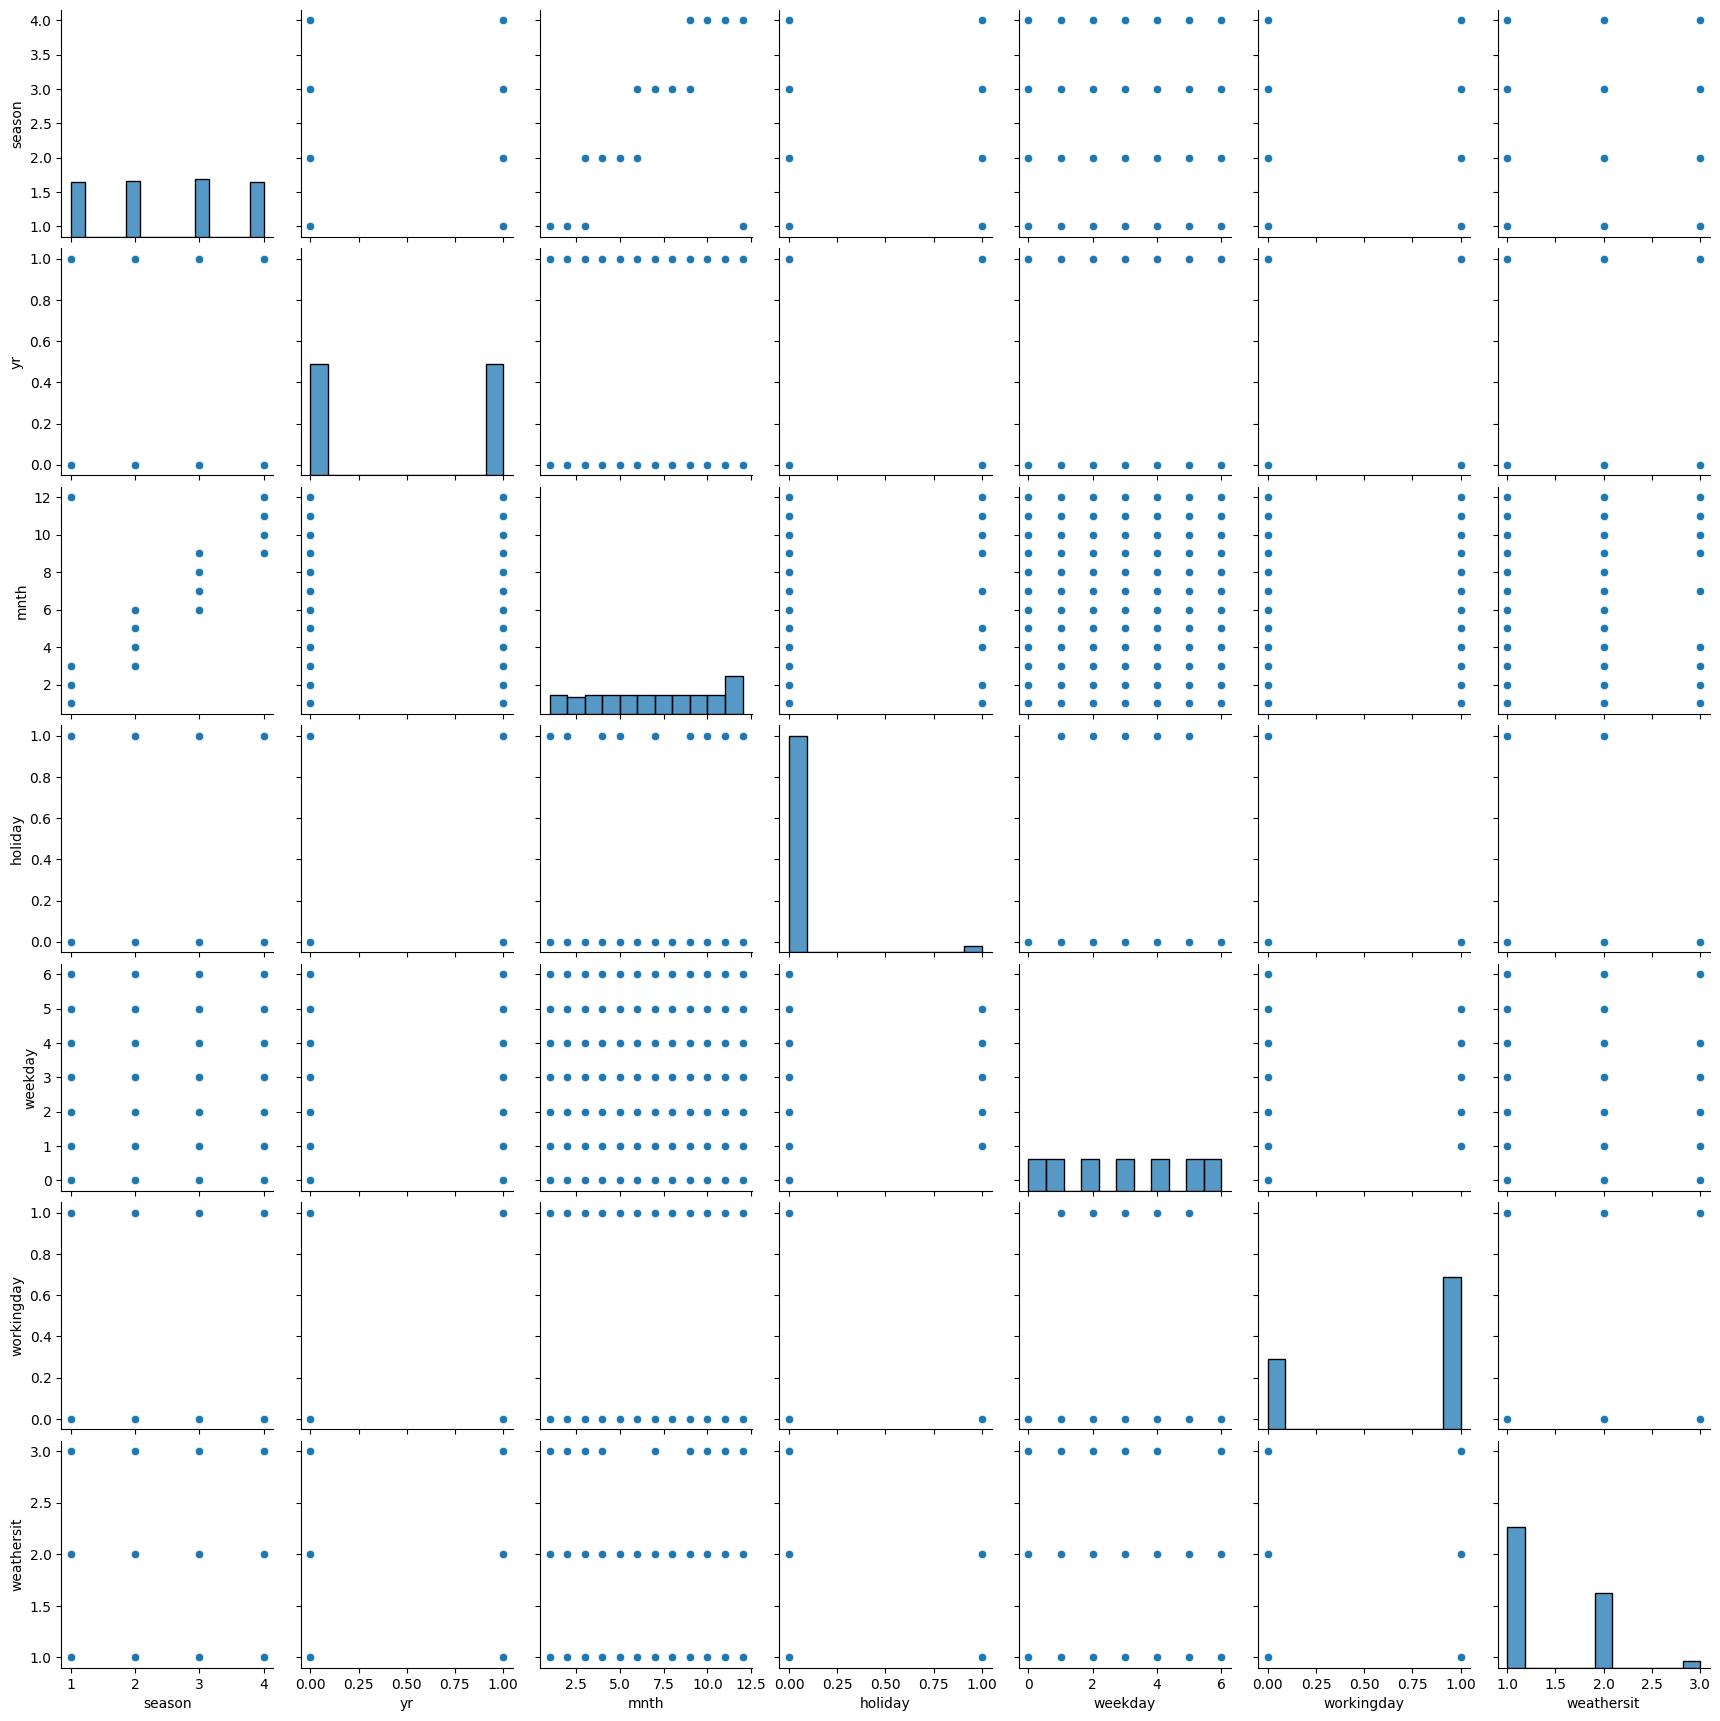

In [157]:
sns.pairplot(df[num_cols])
sns.pairplot(df[cat_cols])

## Observation for the above graphs
### •There is a strong positive correlation between temp and atemp, as indicated by the nearly linear relationship in their scatter plot.
### •The variable yr has two distinct values indicating two different years, which is visible in the scatter plots involving yr.
### •The casual, registered, and cnt variables also show strong positive correlations with each other, which is expected since cnt is the sum of casual and registered.
### •The distributions of the variables like temp, atemp, hum, and windspeed are shown in the diagonal subplots, giving insights into their ranges and common values.

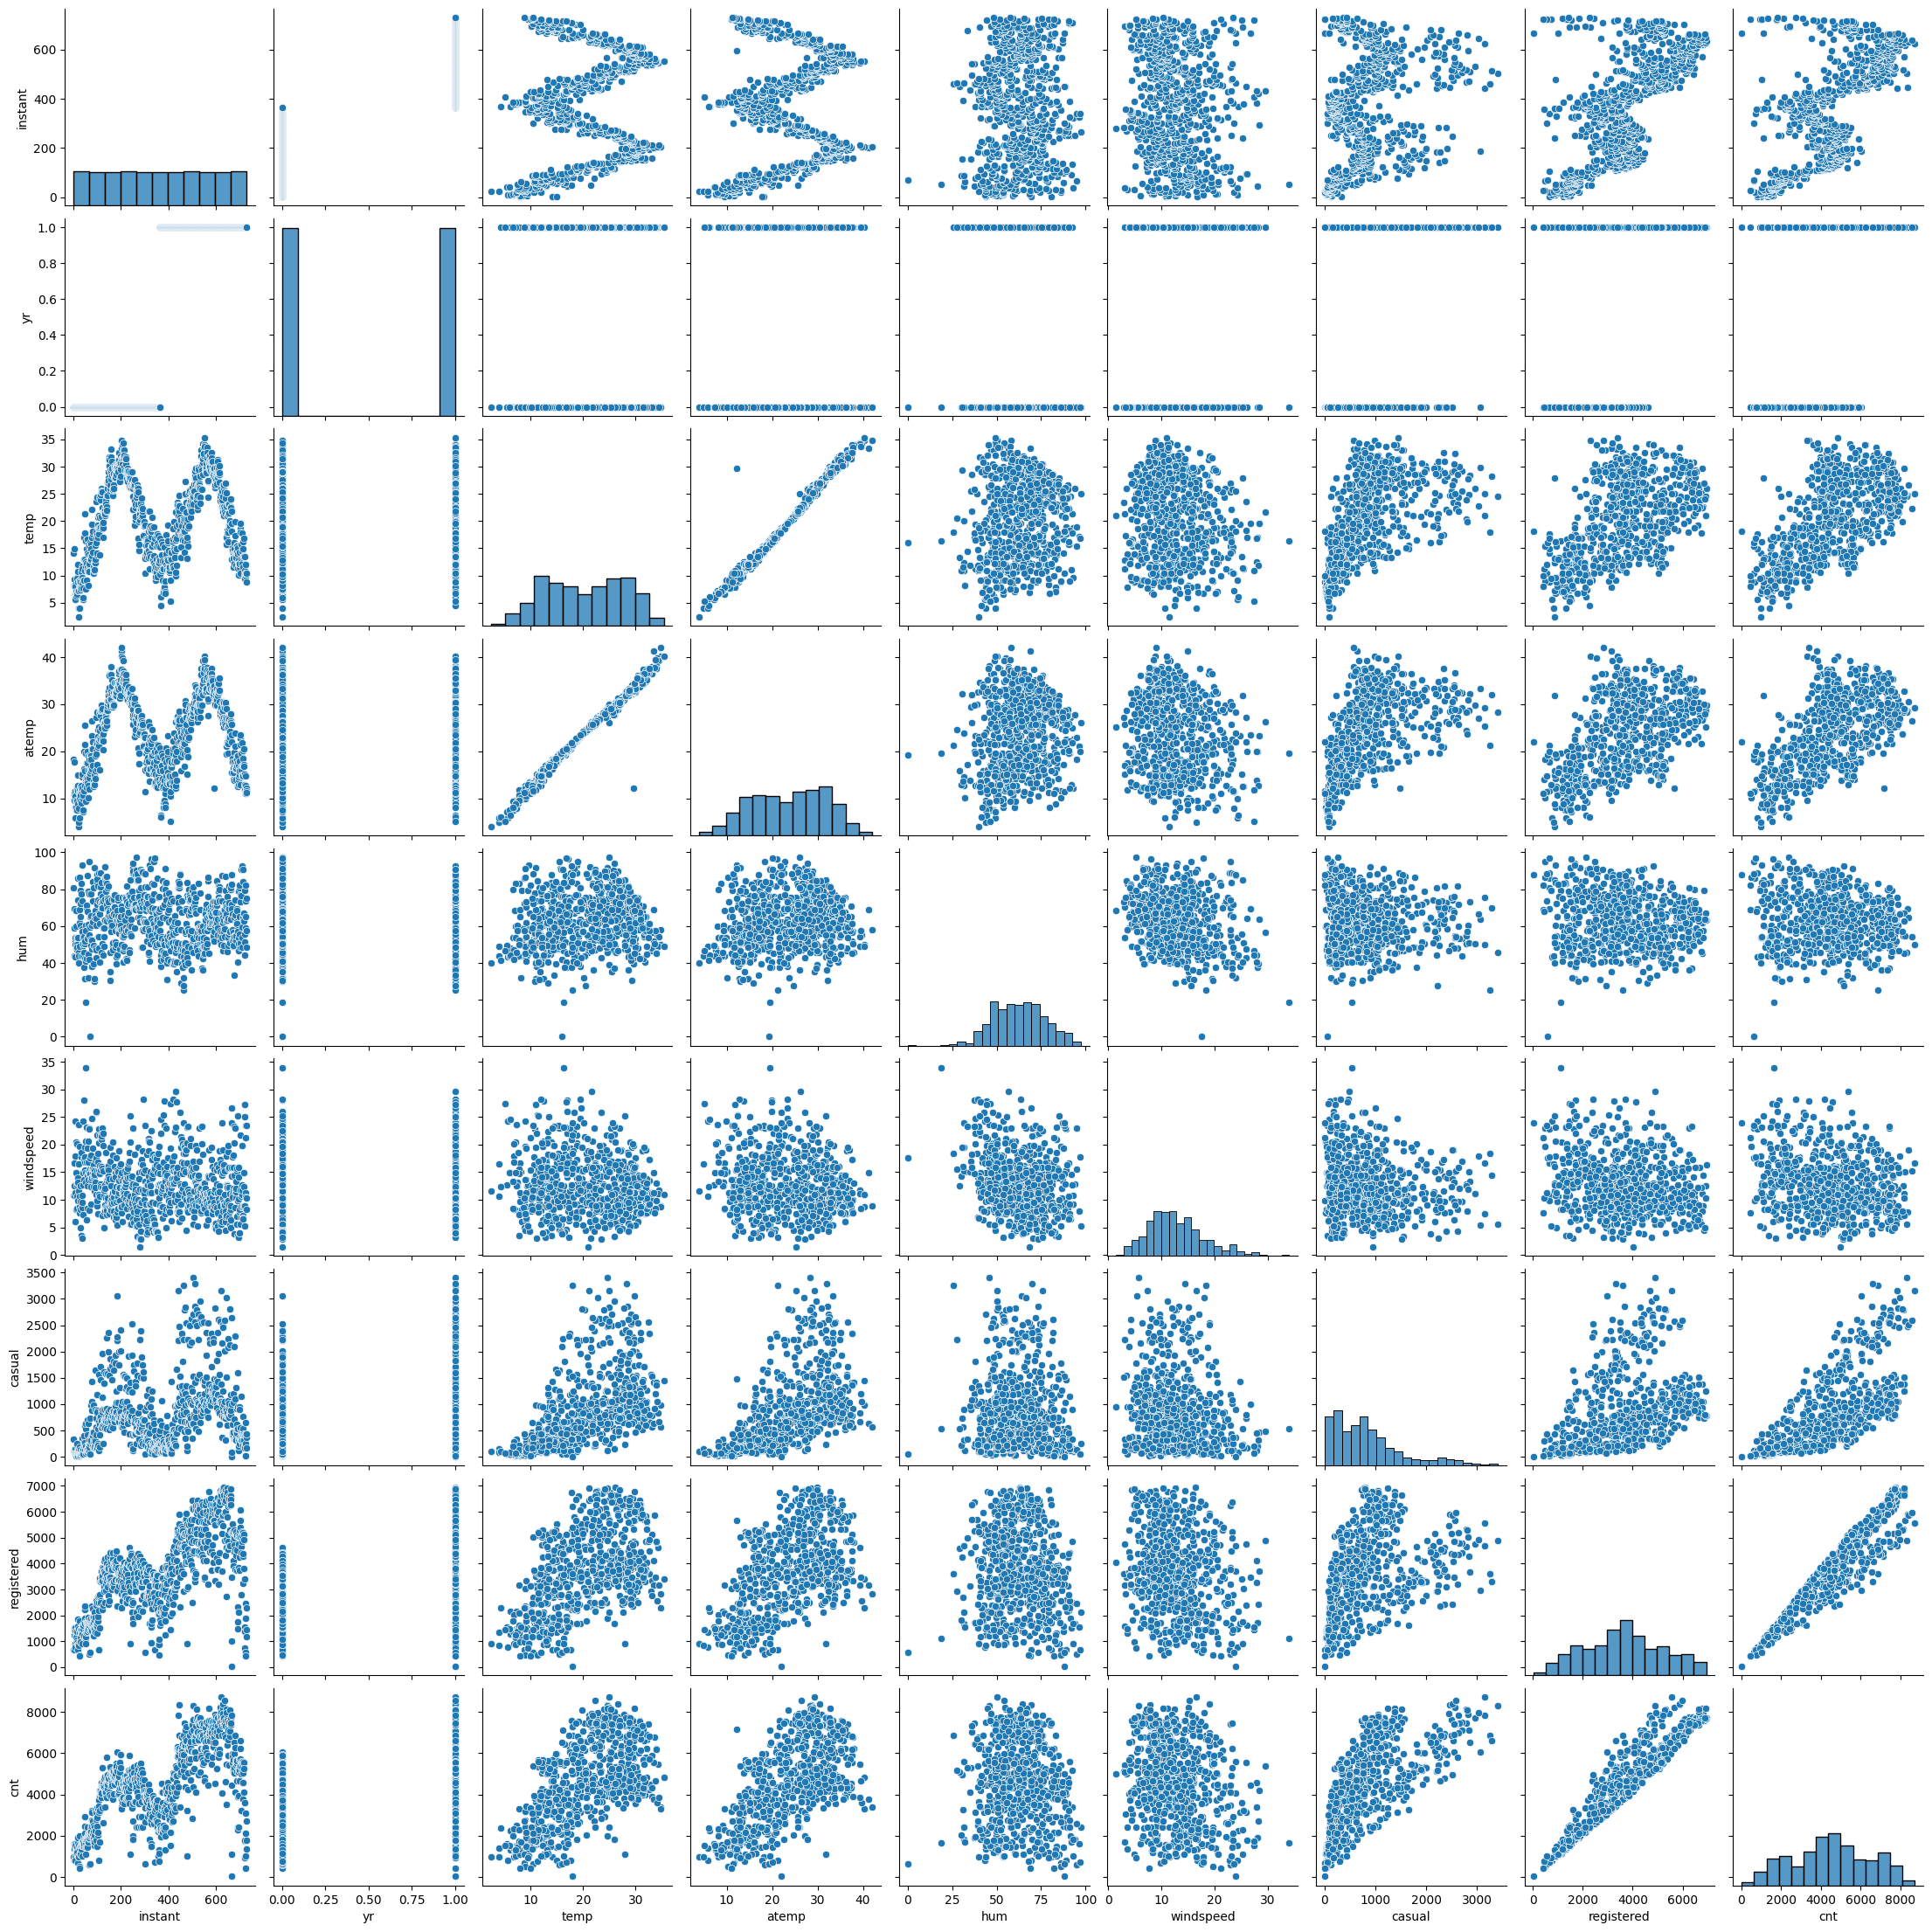

In [158]:
# Convert categorical numerical features to strings
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['weathersit'] = df['weathersit'].map({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
})

# Select relevant numerical columns for the pair plot
selected_columns = ['instant', 'yr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Create the pair plot
sns.pairplot(df[selected_columns])
plt.show()

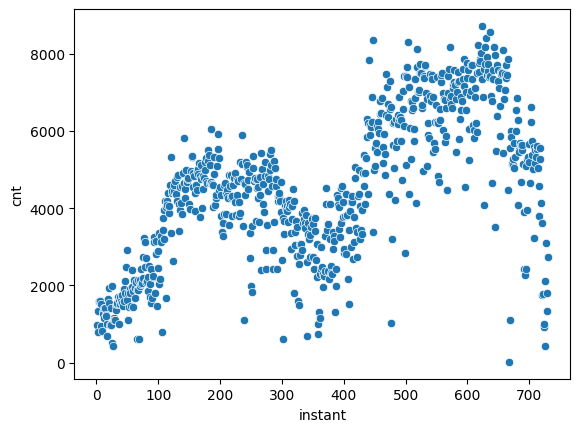

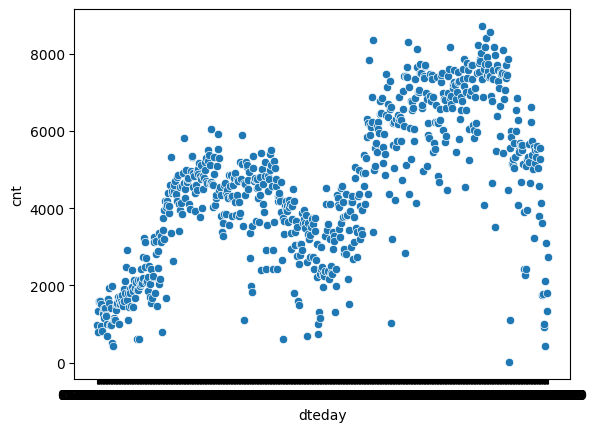

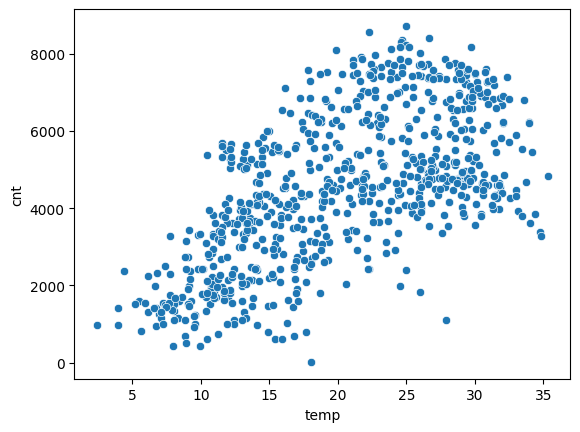

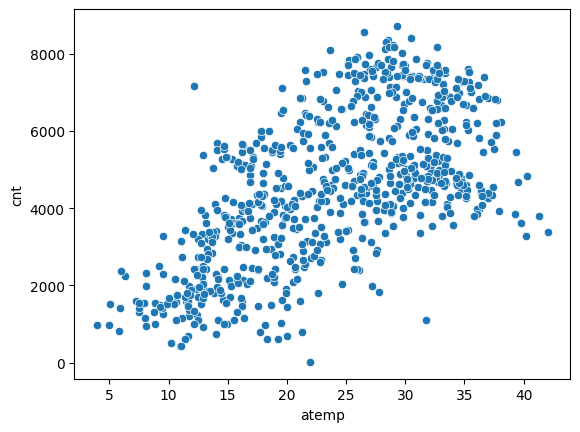

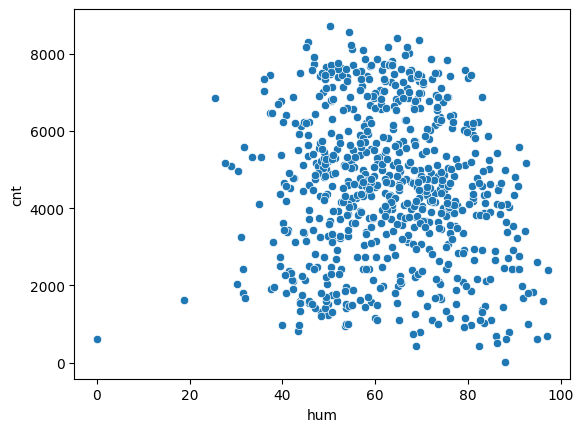

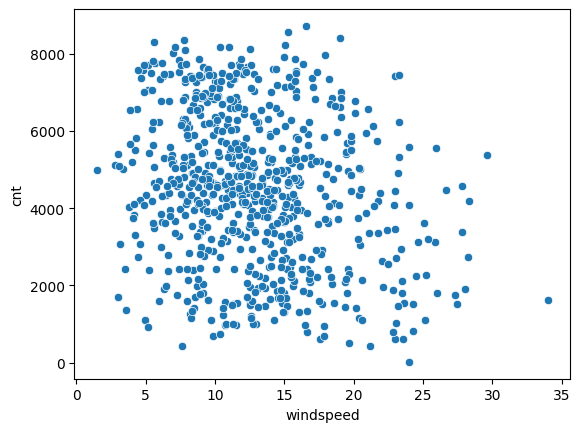

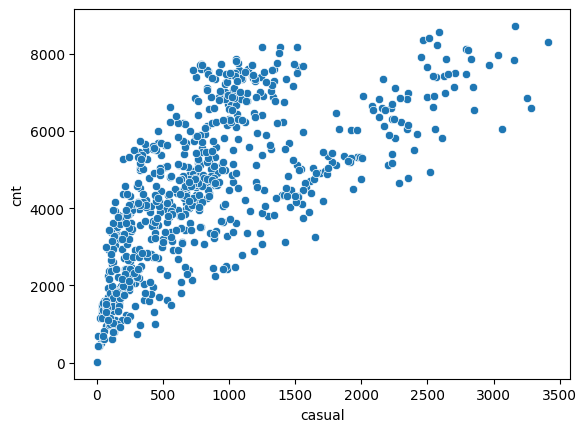

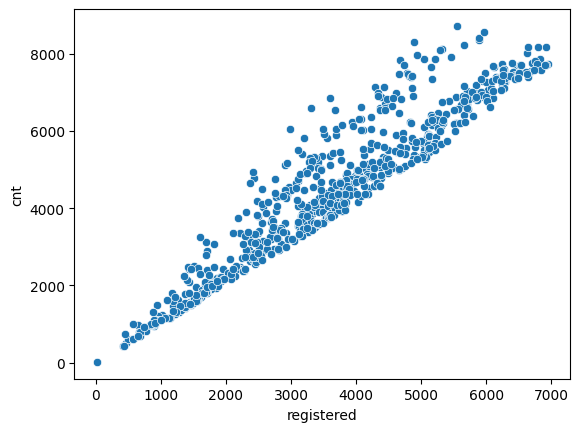

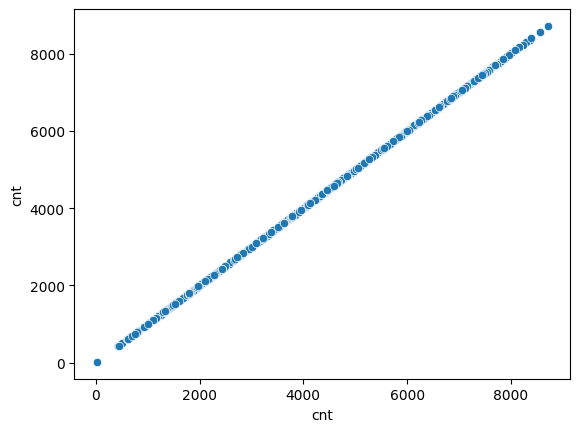

In [159]:
for i in num_cols:
    sns.scatterplot(x=df[i],y=df['cnt'])
    plt.show()

### Multivariate Analysis

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_16504\707908900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[num_cols].corr(),annot=True)


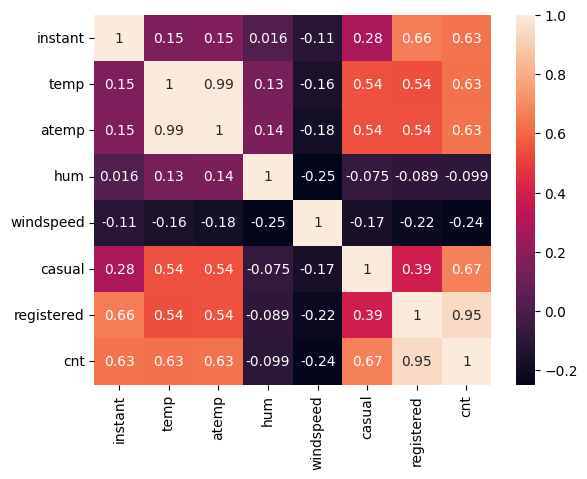

In [160]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.show()

### Conclusion:
From the above heatmap, we can decide which variables to include in our regression model. High correlations between independent variables suggest multicollinearity, which may require further investigation, such as using Variance Inflation Factor (VIF) to decide if any variable should be removed.

C:\Users\rashmi.bharti\AppData\Local\Temp\ipykernel_16504\2115547924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


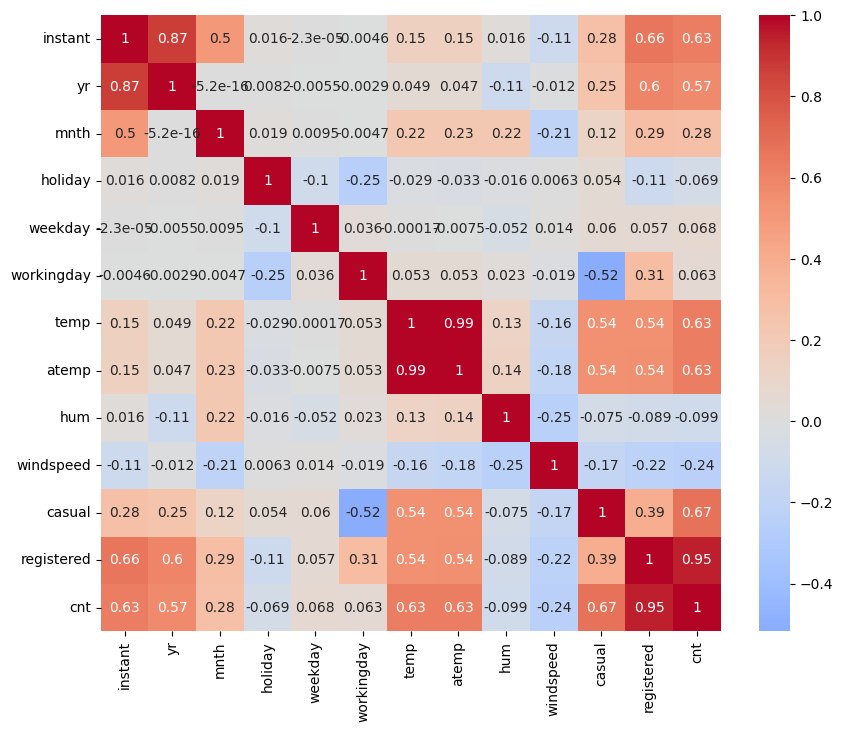

In [161]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

### Insights:
#### Highly Correlated Variables:

temp and atemp are highly correlated. Including both might introduce multicollinearity into the model.
yr is positively correlated with cnt and registered, indicating increased bike usage over time.
#### Moderately Correlated Variables:

temp and atemp with cnt suggest that warmer temperatures increase bike usage.
casual and registered users have different patterns, with casual users being less affected by workingday.
#### Low Correlation Variables:

hum and windspeed have low correlations with the total count of bike rentals, indicating less influence on bike usage.

# Pre-processing steps

#### 1. Dropping two columns 'casual' and 'registered'

In [162]:
df1=df1.drop(["registered"],axis=1)

In [163]:
df1=df1.drop(["casual"],axis=1)

In [164]:
df[cat_cols].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [165]:
df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [166]:
df["weathersit"].unique()

array(['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'],
      dtype=object)

In [167]:
df["weekday"].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [168]:
df["mnth"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### 2. Dummy variable Encoding(One Hot Encoding)

In [169]:
# One-hot encode the categorical variables
data_encoded = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True,dtype=int)

# Display the first few rows of the dataframe to verify the encoding
print(data_encoded.head())

   instant      dteday  yr  holiday  workingday       temp     atemp      hum  \
0        1  01-01-2018   0        0           0  14.110847  18.18125  80.5833   
1        2  02-01-2018   0        0           0  14.902598  17.68695  69.6087   
2        3  03-01-2018   0        0           1   8.050924   9.47025  43.7273   
3        4  04-01-2018   0        0           1   8.200000  10.60610  59.0435   
4        5  05-01-2018   0        0           1   9.305237  11.46350  43.6957   

   windspeed  casual  ...  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  \
0  10.749882     331  ...       0        0        0        0          0   
1  16.652113     131  ...       0        0        0        0          0   
2  16.636703     120  ...       0        0        0        0          1   
3  10.739832     108  ...       0        0        0        0          0   
4  12.522300      82  ...       0        0        0        0          0   

   weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  
0  

In [170]:
data_encoded.shape

(730, 34)

In [171]:
df1=pd.concat([df,data_encoded],axis=1)
df1.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018  spring   0     1        0        6           0   
1        2  02-01-2018  spring   0     1        0        0           0   
2        3  03-01-2018  spring   0     1        0        1           1   
3        4  04-01-2018  spring   0     1        0        2           1   
4        5  05-01-2018  spring   0     1        0        3           1   

                                          weathersit       temp  ...  mnth_9  \
0  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.110847  ...       0   
1  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  14.902598  ...       0   
2    Clear, Few clouds, Partly cloudy, Partly cloudy   8.050924  ...       0   
3    Clear, Few clouds, Partly cloudy, Partly cloudy   8.200000  ...       0   
4    Clear, Few clouds, Partly cloudy, Partly cloudy   9.305237  ...       0   

   mnth_10  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3 weekday_4  \
0        0        0        0          0          0          0         0   
1        0        0        0          0          0          0         0   
2        0        0        0          1          0          0         0   
3        0        0        0          0          1          0         0   
4        0        0        0          0          0          1         0   

   weekday_5  weekday_6  
0          0          1  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 50 columns]

In [172]:
df1=df1.drop(['season', 'weathersit', 'mnth', 'weekday'],axis=1)

In [173]:
df1.shape

(730, 46)

In [174]:
df1.columns=df1.columns.astype(str)
df1.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'instant', 'dteday',
       'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'season_spring', 'season_summer',
       'season_winter',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

# Train Test Split

In [175]:
# Define the features and target variable
X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
Y = df['cnt']

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [177]:
X_train.head()

season  yr  mnth  holiday  weekday  workingday  \
367  spring   1     1        0        2           1   
648  winter   1    10        0        4           1   
44   spring   0     2        0        1           1   
705  winter   1    12        0        5           1   
379  spring   1     1        0        0           0   

                                            weathersit       temp     atemp  \
367    Clear, Few clouds, Partly cloudy, Partly cloudy   6.150000   6.31375   
648    Clear, Few clouds, Partly cloudy, Partly cloudy  17.835000  21.55835   
44     Clear, Few clouds, Partly cloudy, Partly cloudy  17.015000  19.91750   
705  Mist + Cloudy, Mist + Broken clouds, Mist + Fe...  13.154153  16.09790   
379    Clear, Few clouds, Partly cloudy, Partly cloudy   6.833347   8.08125   

         hum  windspeed  
367  44.1250  24.499957  
648  46.3333  12.166932  
44   37.5833  27.999836  
705  76.4167   8.750200  
379  41.9167  16.834286

# Scaling

In [179]:
X_train.columns=X_train.columns.astype(str)
X_test.columns=X_test.columns.astype(str)

In [180]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [181]:
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [182]:
X_train_df.head(2)

yr   holiday  workingday      temp     atemp       hum  windspeed  \
0  0.959715 -0.167836    0.702959 -0.985606 -0.960523 -0.103434  -0.473324   
1  0.959715  5.958188   -1.422557 -0.647121 -0.571139  0.536841   0.022275   

   season_spring  season_summer  season_winter  ...    mnth_9   mnth_10  \
0      -0.547955      -0.590157       1.729794  ... -0.314523 -0.314523   
1      -0.547955      -0.590157       1.729794  ... -0.314523  3.179418   

    mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0  3.142028 -0.28344  -0.417986   -0.38846   -0.40498   2.411086  -0.385116   
1 -0.318266 -0.28344   2.392422   -0.38846   -0.40498  -0.414751  -0.385116   

   weekday_6  
0  -0.421212  
1  -0.421212  

[2 rows x 29 columns]

# Feature Selection

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [184]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)

In [185]:
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True,  True, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False])

In [186]:
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'atemp', 'season_spring',
       'weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')


In [187]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

# Modeling

In [189]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [190]:
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.89e-169
Time:                        22:46:56   Log-Likelihood:                -4175.4
No. Observations:                 511   AIC:                             8375.
Df Residuals:                     499   BIC:                             8426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               4552.9511     38.310    118.845      0.000    4477.682    4628.220
yr                                                                                                  1009.4777     38.525     26.203      0.000     933.786    1085.169
holiday                                                                                              -74.4549     39.158     -1.901      0.058    -151.389       2.480
workingday                                                                                            69.3053     28.783      2.408      0.016      12.755     125.855
atemp                                                                                                696.9909     51.113     13.636      0.000     596.568     797.414
season_spring                                                                                       -672.9164     50.457    -13.336      0.000    -772.051    -573.782
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -378.6048     39.361     -9.619      0.000    -455.939    -301.271
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -299.7704     38.882     -7.710      0.000    -376.163    -223.378
weekday_1                                                                                            -24.4769     33.570     -0.729      0.466     -90.434      41.480
weekday_2                                                                                            -39.4155     33.431     -1.179      0.239    -105.098      26.267
weekday_3                                                                                             28.2838     33.453      0.845      0.398     -37.443      94.011
weekday_4                                                                                             45.8732     32.913      1.394      0.164     -18.791     110.538
weekday_5                                                                                             48.8756     33.532      1.458      0.146     -17.005     114.756
==============================================================================
Omnibus:                       49.335   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.956
Skew:                          -0.625   Prob(JB):                     5.88e-19
Kurtosis:                       4.544   Cond. No.                     2.48e+15
================

In [199]:
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.89e-169
Time:                        23:14:42   Log-Likelihood:                -4175.4
No. Observations:                 511   AIC:                             8375.
Df Residuals:                     499   BIC:                             8426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               4552.9511     38.310    118.845      0.000    4477.682    4628.220
yr                                                                                                  1009.4777     38.525     26.203      0.000     933.786    1085.169
holiday                                                                                              -74.4549     39.158     -1.901      0.058    -151.389       2.480
workingday                                                                                            69.3053     28.783      2.408      0.016      12.755     125.855
atemp                                                                                                696.9909     51.113     13.636      0.000     596.568     797.414
season_spring                                                                                       -672.9164     50.457    -13.336      0.000    -772.051    -573.782
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -378.6048     39.361     -9.619      0.000    -455.939    -301.271
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -299.7704     38.882     -7.710      0.000    -376.163    -223.378
weekday_1                                                                                            -24.4769     33.570     -0.729      0.466     -90.434      41.480
weekday_2                                                                                            -39.4155     33.431     -1.179      0.239    -105.098      26.267
weekday_3                                                                                             28.2838     33.453      0.845      0.398     -37.443      94.011
weekday_4                                                                                             45.8732     32.913      1.394      0.164     -18.791     110.538
weekday_5                                                                                             48.8756     33.532      1.458      0.146     -17.005     114.756
==============================================================================
Omnibus:                       49.335   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.956
Skew:                          -0.625   Prob(JB):                     5.88e-19
Kurtosis:                       4.544   Cond. No.                     2.48e+15
================

# VIF

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

C:\Users\rashmi.bharti\AppData\Local\Programs\Python\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature       VIF
0                                               const  1.000000
1                                                  yr  1.011262
2                                             holiday       inf
3                                          workingday       inf
4                                               atemp  1.780064
5                                       season_spring  1.734675
6   weathersit_Light Snow, Light Rain + Thundersto...  1.055633
7   weathersit_Mist + Cloudy, Mist + Broken clouds...  1.030086
8                                           weekday_1       inf
9                                           weekday_2       inf
10                                          weekday_3       inf
11                                          weekday_4       inf
12                                          weekday_5       inf

## Since acceptable range for VIF is <5, hence above data is showing <5 for all

In [201]:
model3=sm.OLS(np.array(y_train),X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     186.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          4.89e-169
Time:                        23:20:32   Log-Likelihood:                -4175.4
No. Observations:                 511   AIC:                             8375.
Df Residuals:                     499   BIC:                             8426.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                               4552.9511     38.310    118.845      0.000    4477.682    4628.220
yr                                                                                                  1009.4777     38.525     26.203      0.000     933.786    1085.169
holiday                                                                                              -74.4549     39.158     -1.901      0.058    -151.389       2.480
workingday                                                                                            69.3053     28.783      2.408      0.016      12.755     125.855
atemp                                                                                                696.9909     51.113     13.636      0.000     596.568     797.414
season_spring                                                                                       -672.9164     50.457    -13.336      0.000    -772.051    -573.782
weathersit_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  -378.6048     39.361     -9.619      0.000    -455.939    -301.271
weathersit_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                             -299.7704     38.882     -7.710      0.000    -376.163    -223.378
weekday_1                                                                                            -24.4769     33.570     -0.729      0.466     -90.434      41.480
weekday_2                                                                                            -39.4155     33.431     -1.179      0.239    -105.098      26.267
weekday_3                                                                                             28.2838     33.453      0.845      0.398     -37.443      94.011
weekday_4                                                                                             45.8732     32.913      1.394      0.164     -18.791     110.538
weekday_5                                                                                             48.8756     33.532      1.458      0.146     -17.005     114.756
==============================================================================
Omnibus:                       49.335   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.956
Skew:                          -0.625   Prob(JB):                     5.88e-19
Kurtosis:                       4.544   Cond. No.                     2.48e+15
================

# Interpretation:
#### The model is statistically significant as indicated by the F-statistic and its corresponding p-value.
#### The high R-squared value suggests a good fit of the model to the data.
#### Variables like yr, workingday, atemp, and certain weather conditions have significant effects on the dependent variable.
#### Coefficients provide insight into the direction (positive or negative) and magnitude of the relationships between the independent variables and the dependent variable.
#### The confidence intervals provide a range of plausible values for the coefficients, allowing for an assessment of their precision.
# Conclusion:
#### The regression analysis indicates that the model explains a substantial portion of the variance in the dependent variable and identifies significant predictors that influence the outcome. These findings can be used for further analysis, interpretation, and decision-making based on the dataset.

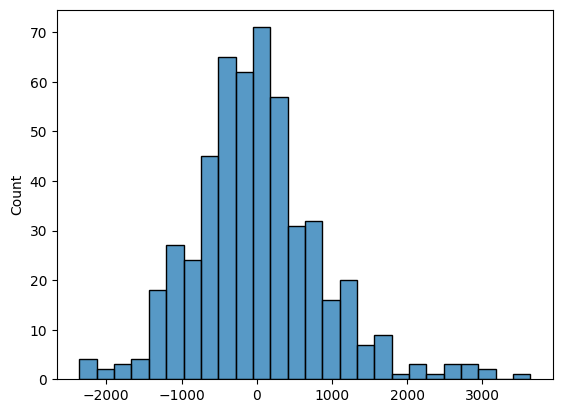

In [204]:
sns.histplot(res3.predict(X_train_sm)-y_train.reset_index(drop=True))
plt.show()

# Conclusions:
### Good Fit:
#### The model appears to have a good fit as the residuals are normally distributed around zero. This suggests that the linear regression model is capturing the relationship between the predictors and the target variable reasonably well.
### Model Diagnostics:
#### While the overall fit looks good, the presence of some outliers suggests that there might be some observations with large prediction errors. These might need further investigation to understand if they are due to specific conditions or anomalies in the data.
